In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/M1 2IS - Computational Intelligence/figures/')
sys.path.append('/content/drive/MyDrive/Colab Notebooks/M1 2IS - Computational Intelligence/sols/')

Mounted at /content/drive


# K Nearest Neighbors

The first method we'll look at is called K Nearest Neighbors. It sounds similar to K means, but don't confuse them just because their name sounds the same.

The principle behind nearest neighbor methods is to find a predefined number of training samples, *k*, closest in distance to the new point, and predict the label from these. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data.

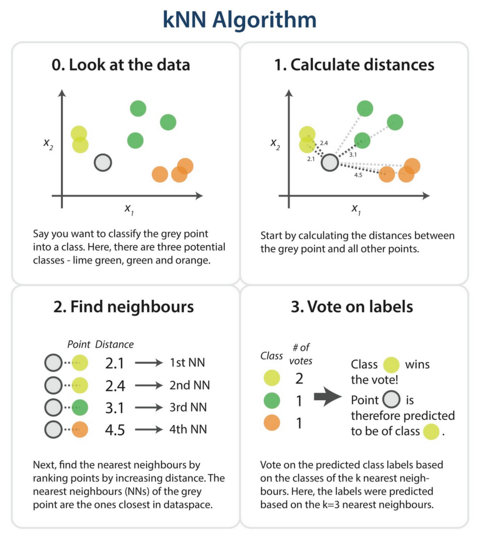

Source: [https://www.datasciencecentral.com/]

## Classification

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

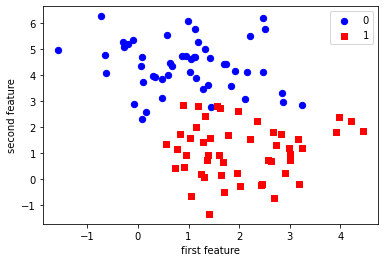

In [3]:
X, y = make_blobs(centers=2, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [4]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

We fit the model with out training data

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

knn.fit(X_train, y_train);

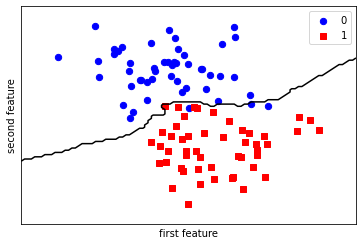

In [11]:
from plot_2d_separator import plot_2d_separator
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [12]:
knn.score(X_test, y_test)

0.92

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``02_iris_knn.py`` from the course website. Play with different values of the ``n_neighbors`` and observe how training and test classification change. Also change the ``weights`` argument from ``uniform`` to ``distance`` and note the classification change.
      </li>
    </ul>
</div>

In [19]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()


for k in [1, 3, 5, 7, 9, 15, 25, 30]:

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                        test_size=0.25)

    knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    print('k: %d, Train Acc: %.3f, Test Acc: %.3f' % (k, train_score, test_score))
"""
train_labels = knn.predict(X_train)
test_labels = knn.predict(X_test)

plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.title("Real labels [train]")
plt.subplot(2, 2, 2)
plt.scatter(X_train[:,0], X_train[:,1], c=train_labels)
plt.title("KNN [train]")
plt.subplot(2, 2, 3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)
plt.title("Real labels [test]")
plt.subplot(2, 2, 4)
plt.scatter(X_test[:,0], X_test[:,1], c=test_labels)
plt.title("KNN [test]");
"""

k: 1, Train Acc: 1.000, Test Acc: 0.974
k: 3, Train Acc: 1.000, Test Acc: 0.974
k: 5, Train Acc: 1.000, Test Acc: 1.000
k: 7, Train Acc: 1.000, Test Acc: 0.974
k: 9, Train Acc: 1.000, Test Acc: 0.947
k: 15, Train Acc: 1.000, Test Acc: 1.000
k: 25, Train Acc: 1.000, Test Acc: 0.974
k: 30, Train Acc: 1.000, Test Acc: 0.974


'\ntrain_labels = knn.predict(X_train)\ntest_labels = knn.predict(X_test)\n\nplt.figure(figsize=(16,8))\nplt.subplot(2, 2, 1)\nplt.scatter(X_train[:,0], X_train[:,1], c=y_train)\nplt.title("Real labels [train]")\nplt.subplot(2, 2, 2)\nplt.scatter(X_train[:,0], X_train[:,1], c=train_labels)\nplt.title("KNN [train]")\nplt.subplot(2, 2, 3)\nplt.scatter(X_test[:,0], X_test[:,1], c=y_test)\nplt.title("Real labels [test]")\nplt.subplot(2, 2, 4)\nplt.scatter(X_test[:,0], X_test[:,1], c=test_labels)\nplt.title("KNN [test]");\n'

## Regression

K nearest neighbors can be easily used in regression as well. This time, instead of voting on a class label based on nearest neighbors, the output value will be the average of the outputs of the *k* nearest neighbors. Here is an example using Airbnb data:

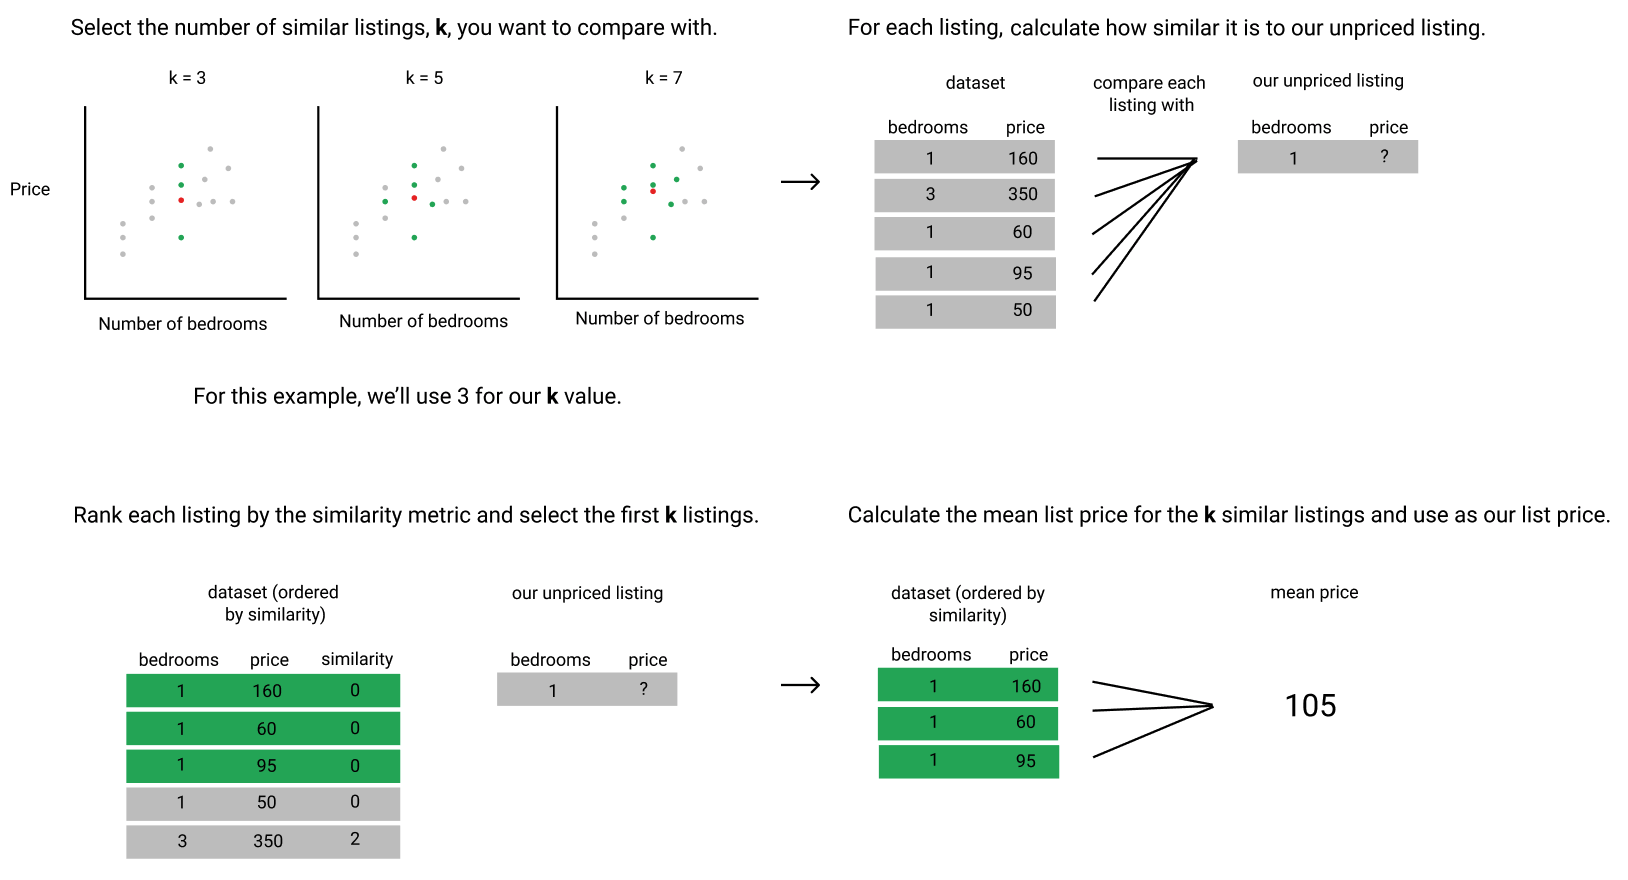

Source: [https://www.dataquest.io]

Let's generate some data based on a ``sin`` curve and see how well K nearest neighbors does.

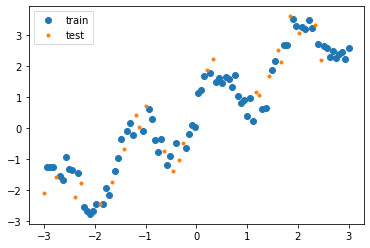

In [20]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
plt.plot(X_train, y_train, 'o', label='train');
plt.plot(X_test, y_test, '.', label='test');
plt.legend(loc='best');

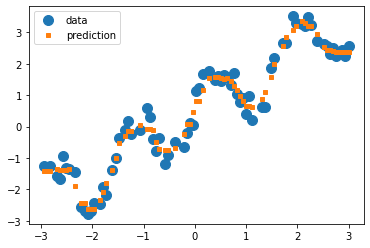

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

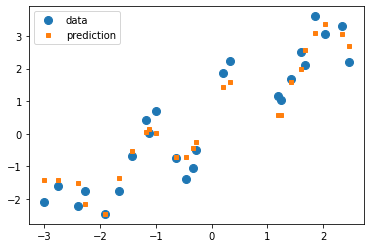

In [22]:
y_pred_test = knn.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

In [23]:
knn.score(X_test, y_test)

0.9416284042675591

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``02_diabetes_knn.py`` from the course website. Play with different values of the ``n_neighbors`` and observe how training and test accuracy change. Also change the ``weights`` argument from ``uniform`` to ``distance`` and note the accuracy change.
      </li>
    </ul>
</div>

k: 10, Train Acc: 1.000, Test Acc: 0.320


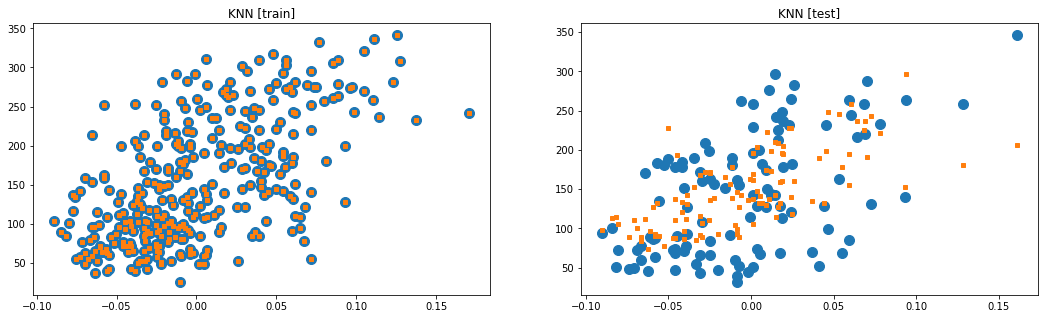

In [31]:
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()

k = 10

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target,
                                                    test_size=0.25)

knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights="distance")
knn.fit(X_train, y_train)
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
print('k: %d, Train Acc: %.3f, Test Acc: %.3f' % (k, train_score, test_score))

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

x_axis = 2

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(X_train[:, x_axis], y_train, 'o', label="data", markersize=10)
plt.plot(X_train[:, x_axis], y_pred_train, 's', label="prediction", markersize=4)
plt.title("KNN [train]")
plt.subplot(1, 2, 2)
plt.plot(X_test[:, x_axis], y_test, 'o', label="data", markersize=10)
plt.plot(X_test[:, x_axis], y_pred_test, 's', label="prediction", markersize=4)
plt.title("KNN [test]");



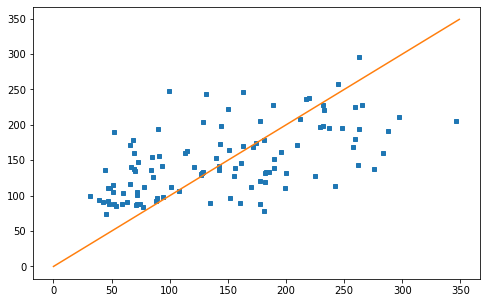

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(y_test, y_pred_test, 's', label="prediction vs. true labels", markersize=4)
plt.plot(range(0,350), range(0,350))